# 6CS012 - Artificial Intelligence and Machine Learning.

## Worksheet 4

**Building a Fully Connected Network (FCN) for Devnagari Digit Classification**

## Task 1: Data Preparation
Loading the Data

- Download the provided folder that contains the Devnagari digits dataset.

- Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

- Convert the images into Numpy arrays and normalize them to a range of 0-1.

- use train folder for training and test for testing.

- Extract the corresponding labels for each image.

Hints:

- Ensure that the images are resized to a consistent shape (e.g., 28x28).

- Convert labels to one-hot encoded format for multi-class classification.

In [20]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
from tensorflow.keras.utils import to_categorical

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# define dataset paths
train_dir = "/content/drive/MyDrive/AI-Workshop/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI-Workshop/DevanagariHandwrittenDigitDataset/Test"

# define image size
img_height, img_width = 28, 28

# function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # map class names to labels

  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]

    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # load image using PIL
      img = Image.open(img_path).convert("L") # convert to grayscale
      img = img.resize((img_width, img_height)) # resize to (28,28)
      img = np.array(img) / 255.0 # normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)

  return np.array(images), np.array(labels)

In [23]:
# load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

### Reshape and One-Hot Encoding Labels

Training set: (17060, 28, 28, 1), Labels: (17060, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


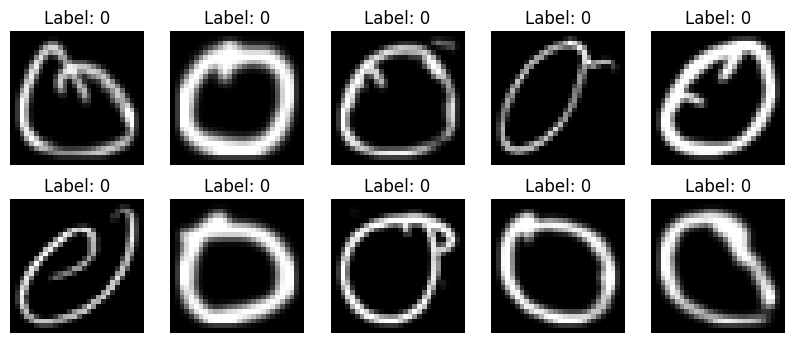

In [24]:
# reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape(num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# one-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

## Task 2: Build the FCN Model

Model Architecture

- Create a Sequential model using Keras.

- Add 3 hidden layers with the following number of neurons:

  – 1st hidden layer: 64 neurons

  – 2nd hidden layer: 128 neurons

  – 3rd hidden layer: 256 neurons

- Use sigmoid activation functions for all hidden layers.

- Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential(
    [
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation='sigmoid'),  # 1st hidden layer
        Dense(128, activation='sigmoid'),  # 2nd hidden layer
        Dense(256, activation='sigmoid'),  # 3rd hidden layer
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ]
)

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Compile the Model

Model Compilation

- Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [29]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Task 4: Train the Model

Model Training

- Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

- Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

- Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [30]:
batch_size = 128
epochs = 20

history = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2595 - loss: 1.9715 - val_accuracy: 0.0029 - val_loss: 7.0355
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8214 - loss: 0.6281 - val_accuracy: 0.0035 - val_loss: 7.8967
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9247 - loss: 0.2755 - val_accuracy: 0.0035 - val_loss: 8.6210
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9430 - loss: 0.1965 - val_accuracy: 0.0035 - val_loss: 9.0704
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9573 - loss: 0.1496 - val_accuracy: 0.0035 - val_loss: 9.3652
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9672 - loss: 0.1168 - val_accuracy: 0.0035 - val_loss: 9.7738
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9728 - loss: 0.1010 - val_accuracy: 0.0035 - val_loss: 9.8797
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9782 - loss: 0.0784 - val_accuracy:

### Visualize the training and validation loss and accuracy

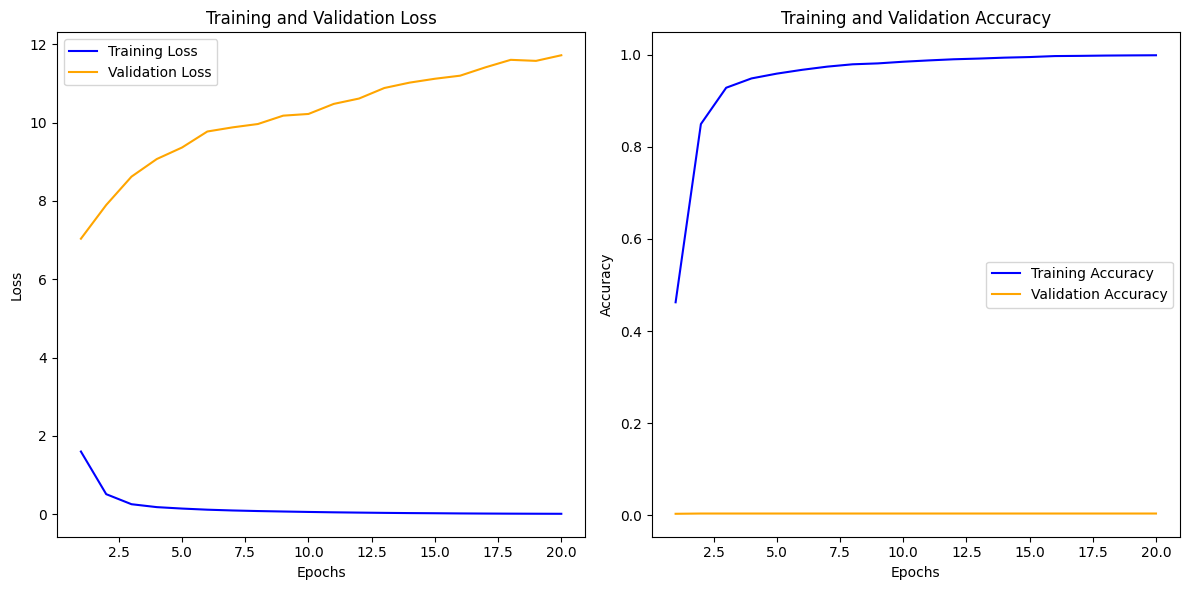

In [31]:
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Task 5: Evaluate the Model

Model Evaluation

- After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 4ms/step - accuracy: 0.7860 - loss: 2.4164
Test accuracy: 0.7860


## Task 6: Save and Load the Model

Model Saving and Loading

- Save the trained model to an .h5 file using model.save().

- Load the saved model and re-evaluate its performance on the test set.

In [33]:
model.save('devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(x_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.3638


[2.416351318359375, 0.7860000133514404]

## Task 7: Predictions

Making Predictions

- Use model.predict() to make predictions on test images.

- Convert the model's predicted probabilities to digit labels using np.argmax().


In [34]:
# predict on test data
predictions = model.predict(x_test)
# convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# display first 10 predictions
for i in range(10):
  print(f"Image {i+1}")
  print(f"Predicted Label: {predicted_labels[i]}")
  print(f"Actual Label: {np.argmax(y_test[i])}\n")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Image 1
Predicted Label: 0
Actual Label: 0

Image 2
Predicted Label: 0
Actual Label: 0

Image 3
Predicted Label: 0
Actual Label: 0

Image 4
Predicted Label: 0
Actual Label: 0

Image 5
Predicted Label: 0
Actual Label: 0

Image 6
Predicted Label: 0
Actual Label: 0

Image 7
Predicted Label: 0
Actual Label: 0

Image 8
Predicted Label: 0
Actual Label: 0

Image 9
Predicted Label: 0
Actual Label: 0

Image 10
Predicted Label: 0
Actual Label: 0

